## import librarires


In [58]:
import tensorflow as tf


In [59]:
import matplotlib.pyplot as plt 
 

In [60]:
import pandas as pd 


In [61]:
import seaborn as sns

## data preprocessing 

### training image processing 

In [63]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


### validation image pre processing 

In [64]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 17572 files belonging to 38 classes.


In [65]:
training_set
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## building model 


In [66]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [67]:
model = Sequential()

### building conv layer

In [68]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=2,strides=2))

In [69]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=2,strides=2))

In [70]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=2,strides=2))

In [71]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=2,strides=2))

In [72]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=2,strides=2))

In [73]:
model.add(Dropout(0.25))

In [74]:
model.add(Flatten())

In [75]:
model.add(Dense(units=1500,activation='relu'))

In [76]:
model.add(Dropout(0.4)) ##to avoid overfitting

## output layer

In [77]:
model.add(Dense(units=38,activation='softmax'))

## compiling model

In [78]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## training the model

In [80]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6045s 3s/step - accuracy: 0.3894 - loss: 2.1667 - val_accuracy: 0.8323 - val_loss: 0.5524
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1824s 830ms/step - accuracy: 0.8365 - loss: 0.5227 - val_accuracy: 0.8977 - val_loss: 0.3175
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1815s 826ms/step - accuracy: 0.9060 - loss: 0.2949 - val_accuracy: 0.9262 - val_loss: 0.2312
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1812s 825ms/step - accuracy: 0.9346 - loss: 0.2017 - val_accuracy: 0.9309 - val_loss: 0.2113
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1780s 810ms/step - accuracy: 0.9515 - loss: 0.1491 - val_accuracy: 0.9467 - val_loss: 0.1648
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1735s 790ms/step - accuracy: 0.9639 - loss: 0.1101 - val_accuracy: 0.9484 - val_loss: 0.1610
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1726s 785ms/step - accuracy: 0.9705 - loss: 0.0915 - val_accuracy: 0.9658 - val_loss: 0.1079
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1726s 785ms/step

## model evaluation 

### on training set 

In [81]:
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1501s 683ms/step - accuracy: 0.9878 - loss: 0.0363


In [82]:
print(train_loss,train_acc)

0.03274410963058472 0.9892737865447998


In [83]:
validation_loss,validation_acc= model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 299s 543ms/step - accuracy: 0.9613 - loss: 0.1319


In [84]:
print(validation_loss,validation_acc)

0.12834317982196808 0.9623833298683167


## saving the model

In [85]:
model.save("trained_model.keras")

In [86]:
training_history.history

{'accuracy': [0.5900561809539795,
  0.857258677482605,
  0.9129810333251953,
  0.9388149976730347,
  0.9542925953865051,
  0.9642648696899414,
  0.9710932374000549,
  0.9750622510910034,
  0.9780354499816895,
  0.9822035431861877],
 'loss': [1.3889975547790527,
  0.4552103877067566,
  0.26897287368774414,
  0.18713225424289703,
  0.14075501263141632,
  0.10961544513702393,
  0.08967424929141998,
  0.07593990117311478,
  0.06625783443450928,
  0.05514831840991974],
 'val_accuracy': [0.8323469161987305,
  0.8976781368255615,
  0.9262462854385376,
  0.9309127926826477,
  0.9467334151268005,
  0.9484407305717468,
  0.9657978415489197,
  0.9650011658668518,
  0.963862955570221,
  0.9623833298683167],
 'val_loss': [0.5523613691329956,
  0.3174949288368225,
  0.23124107718467712,
  0.21130241453647614,
  0.16480588912963867,
  0.16099056601524353,
  0.10786952078342438,
  0.11490331590175629,
  0.12009575217962265,
  0.12834320962429047]}

## recording model history 

In [87]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## accuracy visualization

In [88]:
epochs = [i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

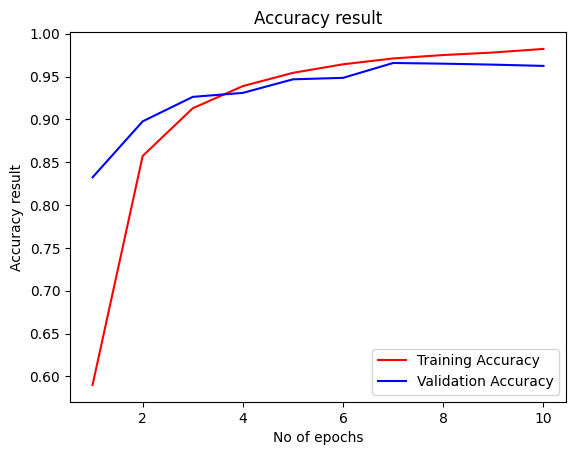

In [97]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy result")
plt.title("Accuracy result")
plt.legend()
plt.show()

## performance metrics

In [98]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [99]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   )

Found 17572 files belonging to 38 classes.


In [100]:
y_pred= model.predict(test_set)
print(y_pred)
print(y_pred.shape)

550/550 ━━━━━━━━━━━━━━━━━━━━ 303s 551ms/step
[[9.9996150e-01 1.4168733e-09 1.8569148e-09 ... 2.2223414e-14
  2.9104662e-15 4.1510190e-13]
 [9.9999976e-01 1.5547182e-10 2.9086801e-11 ... 2.6369499e-16
  3.0912324e-16 3.3021942e-16]
 [9.9999952e-01 5.3650567e-10 1.7850255e-08 ... 1.5146582e-14
  2.8488439e-14 1.4728609e-11]
 ...
 [2.6039254e-10 7.8157966e-14 2.5404781e-10 ... 4.5454252e-12
  2.6091515e-13 9.9994624e-01]
 [1.1011236e-09 5.9346728e-13 1.1795000e-10 ... 4.2839669e-11
  4.9297849e-13 9.9999177e-01]
 [2.1772285e-11 4.9333805e-12 4.3186114e-11 ... 5.8082903e-11
  3.8439341e-10 9.9999726e-01]]
(17572, 38)


In [101]:
predicted_categories = tf.argmax(y_pred,axis=1)
print(predicted_categories)


tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [102]:
true_categories= tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [103]:
Y_true =  tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.99      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

In [107]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### confusion matrix 

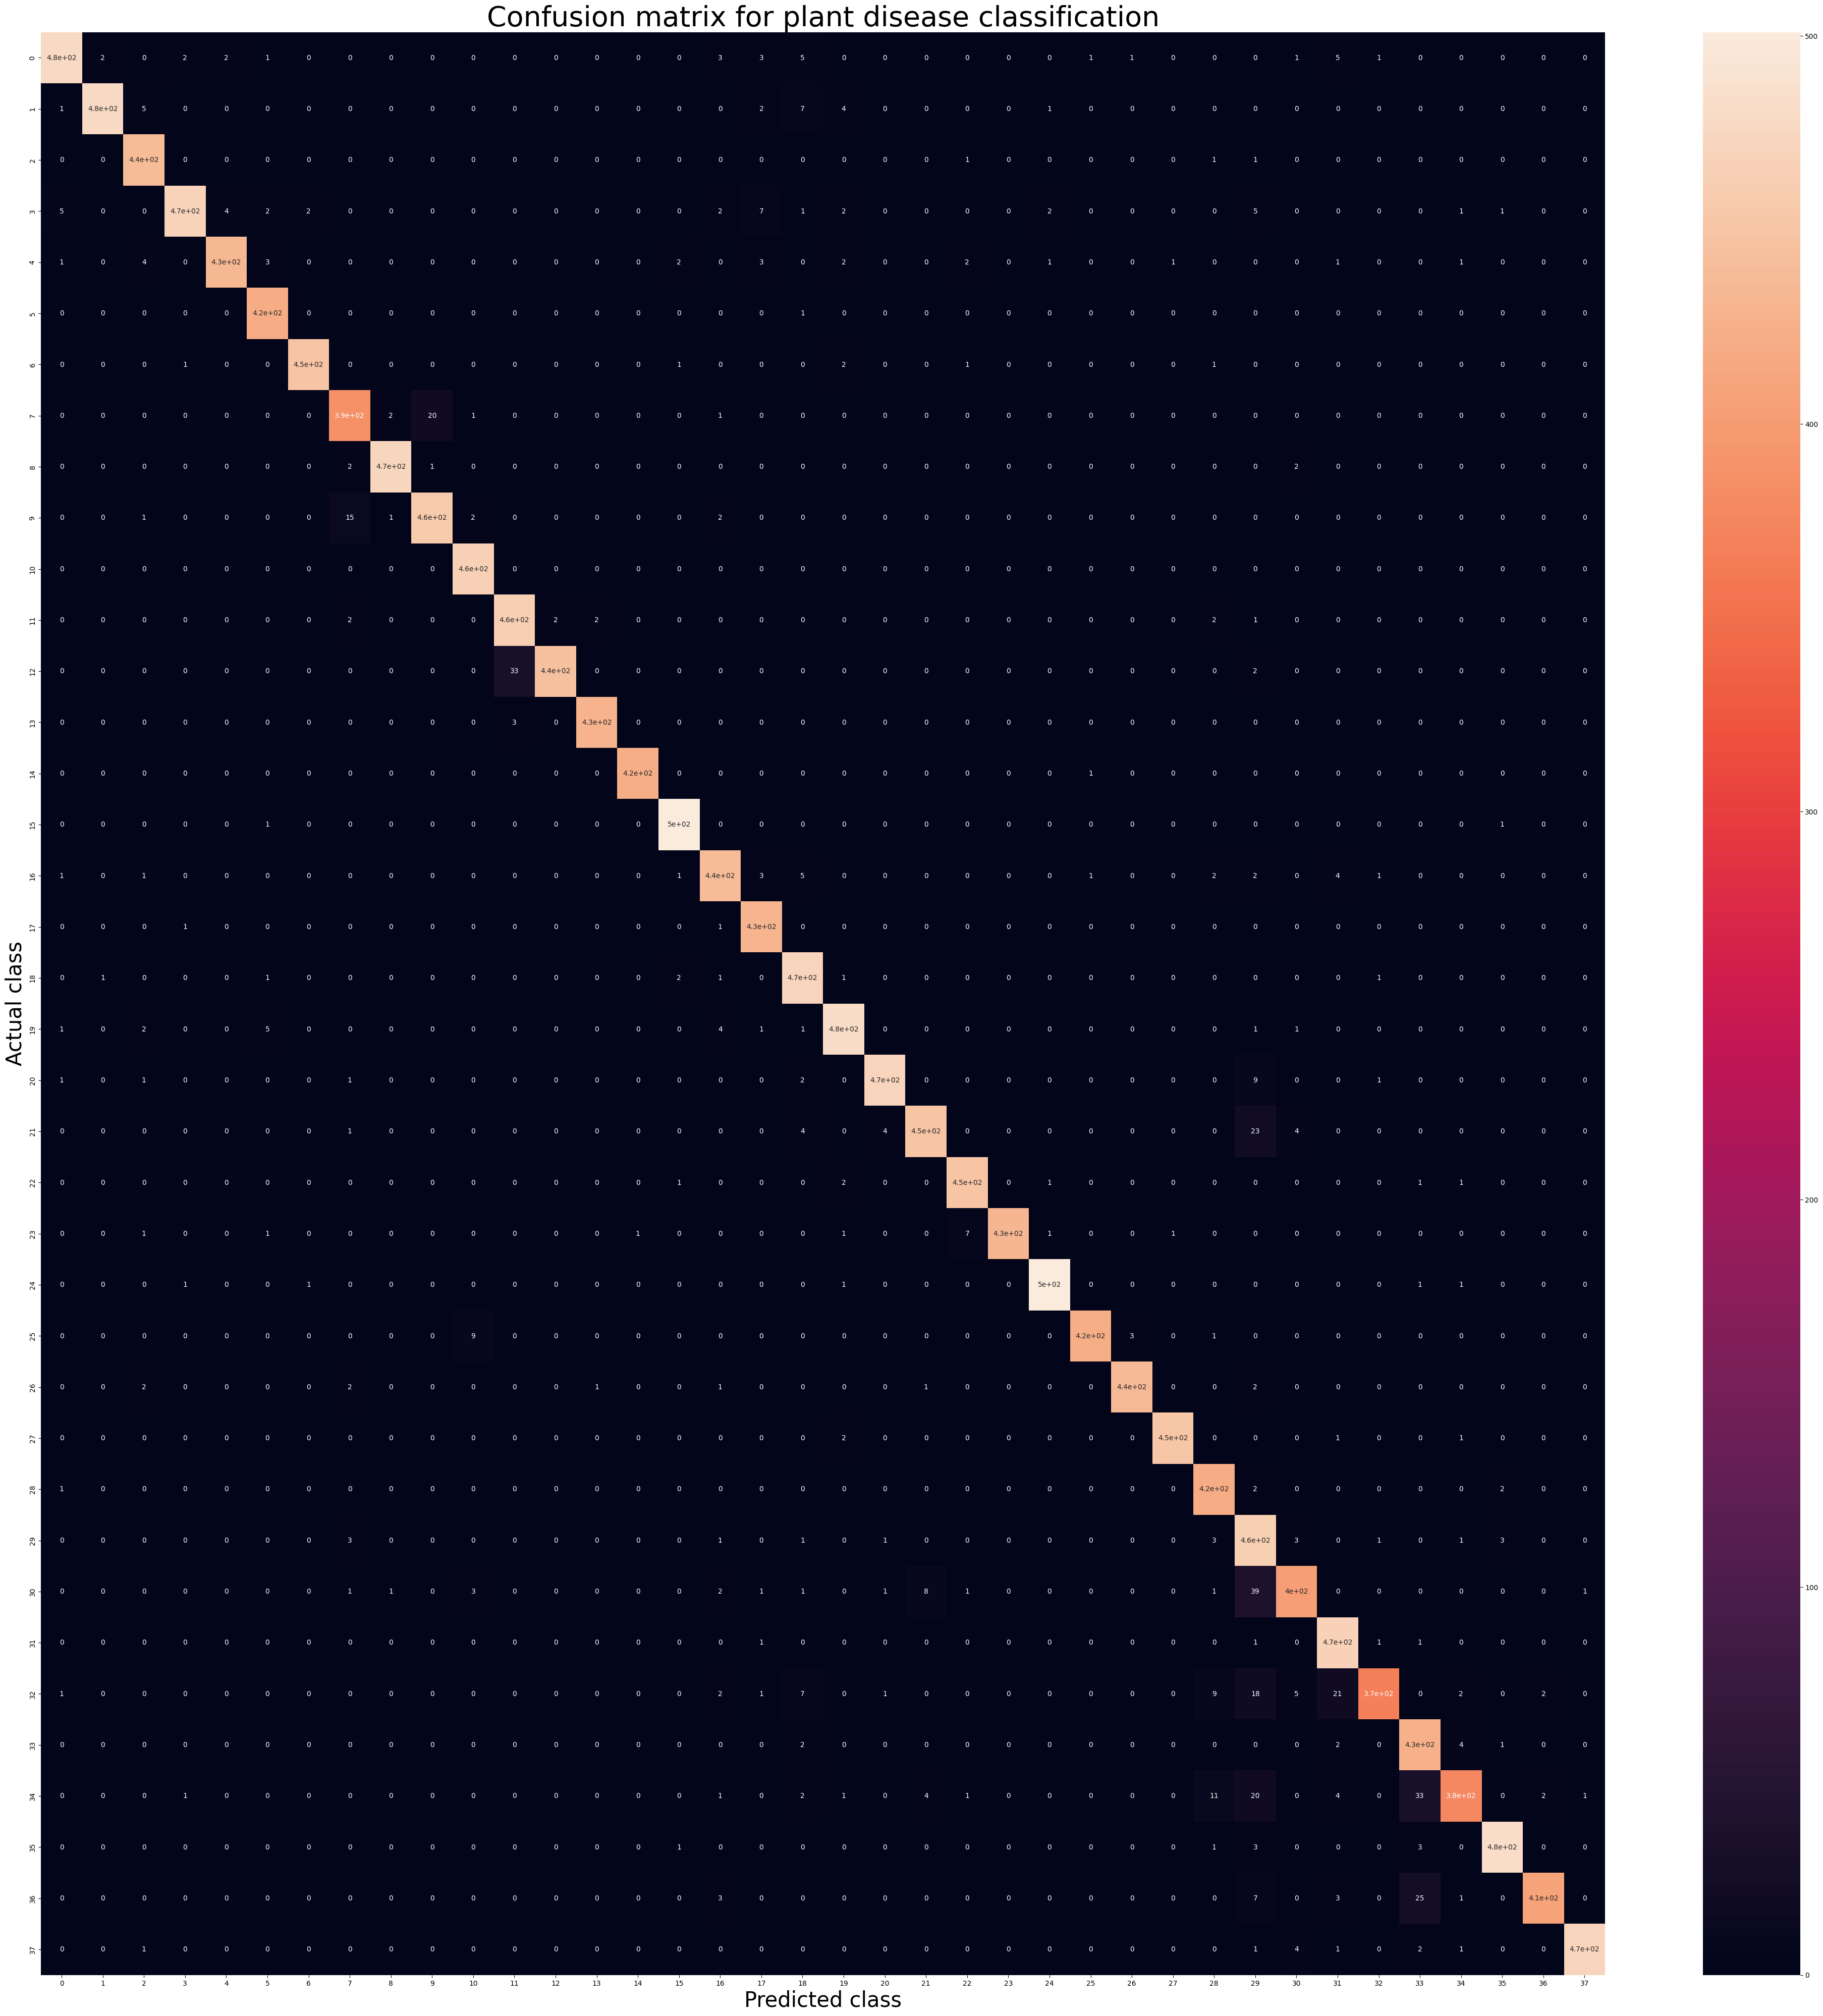

In [112]:

plt.figure(figsize=(50,50))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=30)
plt.ylabel("Actual class",fontsize=30)
plt.title("Confusion matrix for plant disease classification",fontsize=40)
plt.show()